# Plan friends vacation in 2019

### Introduction

This project compiles data about countries and their capitals which are located in europe continent with preferances to help my friends find the best destination for holidays 2019. They always spend a lot of time to choose country for visiting. This analyse is used some important variables to help decide where to go. <br>
They are short in budget. They cant spend more than 125 euros per day for each person.

### Describe Variables and sources:

For execute my idea I use next data:
1. Information about Countries and their capitals, capitals longitude and latitide, which are located in Europe contitnent.
http://techslides.com/list-of-countries-and-capitals.<br>
I use only Europe data because my friends want to travel in capitals of European countries.

2. Information about dailycost which including accomodation, food, entertainment. 
http://www.budgetyourtrip.com/ <br>
This data will help to my friends understand which countries are very expensive, which countries are cheap. 

3. the Foursquare location data using the Capital Name.<br>
It helps to show in high level what they can find in each capitals (restaraunt, museums and etc).<br>

For 1-2 I use parcing.


### Methodology

In first step I have created data base which contains European countries and their capitals names, their locations, and dailycosts. <br> 
My friends are from Moscow, so that s why in data base Russia are excluded.
Also they are short in budget. So they cant spend more than 125 euros per day.
That s why after first step we focus on that countries and their capitals which have daily costs less than 125 euros per day <br> It's 31 countries

<br>

Second step in analysis will be exploration of all possible venues using Foursquare within 10 km from Capitals center. After this we get list of unique venues, where my friends can choose what they are interested in. and we create database of their choice.

<br>


In third and final step after we get database with friends interests,  we will focus on their interesrts and capitals which has all top-5 their interests. After we will get capitals with their wishes, and their preferences. After this they will choose city and discover it more. 

### Analysis

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### 1st step. Create database with European countries, their capitals, location, daily costs

In [3]:
# import library for request web page about countries and their capitals
from urllib.request import urlopen
optionsUrl1 = 'http://techslides.com/list-of-countries-and-capitals'
optionsPage1 = urlopen(optionsUrl1)

In [4]:
# import BS library for pulling data out.
from bs4 import BeautifulSoup
soup1 = BeautifulSoup(optionsPage1)

In [5]:
# Extract all the <table> tags
My_table1 = soup1.find('table')

In [6]:
# search for the one with the headings corresponding to the data we want. Then iterate over its rows, pulling out the columns we want and writing the cell text to the file 

table_rows1 = My_table1.find_all('tr')
res1 = [] 

for tr in table_rows1:
        tds = tr.find_all('td')
        row = [td.text.strip() for td in tds if tr.text.strip()]
        if row:
            res1.append(row)

# transform the data in the table on the Wikipedia page into pandas dataframe
df1 = pd.DataFrame(res1, columns=["Country Name", "Capital Name","Capital Latitude", "Capital Longitude", "Country Code", "Continent Name"])

In [7]:
df1.head()

,Country Name,Capital Name,Capital Latitude,Capital Longitude,Country Code,Continent Name
0,Country Name,Capital Name,Capital Latitude,Capital Longitude,Country Code,Continent Name
1,Afghanistan,Kabul,34.51666667,69.183333,AF,Asia
2,Aland Islands,Mariehamn,60.116667,19.9,AX,Europe
3,Albania,Tirana,41.31666667,19.816667,AL,Europe
4,Algeria,Algiers,36.75,3.05,DZ,Africa


In [8]:
#Ignore double name of table

df1=df1.drop(df1.index[0])


In [9]:
#Exclude cells which are not in Europe continent.

df1.drop(df1[df1['Continent Name']=="Asia"].index,axis=0, inplace=True)
df1.drop(df1[df1['Continent Name']=="Africa"].index,axis=0, inplace=True)
df1.drop(df1[df1['Continent Name']=="Australia"].index,axis=0, inplace=True)
df1.drop(df1[df1['Continent Name']=="North America"].index,axis=0, inplace=True)
df1.drop(df1[df1['Continent Name']=="Antarctica"].index,axis=0, inplace=True)
df1.drop(df1[df1['Continent Name']=="South America"].index,axis=0, inplace=True)
df1.drop(df1[df1['Continent Name']=="Central America"].index,axis=0, inplace=True)
df1.reset_index(drop = True, inplace = True)
df1.head(15)

,Country Name,Capital Name,Capital Latitude,Capital Longitude,Country Code,Continent Name
0,Aland Islands,Mariehamn,60.116667,19.9,AX,Europe
1,Albania,Tirana,41.31666667,19.816667,AL,Europe
2,Andorra,Andorra la Vella,42.5,1.516667,AD,Europe
3,Armenia,Yerevan,40.16666667,44.5,AM,Europe
4,Austria,Vienna,48.2,16.366667,AT,Europe
5,Azerbaijan,Baku,40.38333333,49.866667,AZ,Europe
6,Belarus,Minsk,53.9,27.566667,BY,Europe
7,Belgium,Brussels,50.83333333,4.333333,BE,Europe
8,Bosnia and Herzegovina,Sarajevo,43.86666667,18.416667,BA,Europe
9,Bulgaria,Sofia,42.68333333,23.316667,BG,Europe


In [10]:
# import library for request web page about dailycosts

optionsUrl2 = 'https://www.budgetyourtrip.com/europe/rankings'
optionsPage2 = urlopen(optionsUrl2)

In [11]:
soup2 = BeautifulSoup(optionsPage2)

In [12]:
# Extract all tags with costs
My_table2 = soup2.find_all('span', 'curvalue')

In [13]:
numlist=list()

for tag in My_table2:
    numlist.append(float(tag.contents[0]))
df4 = pd.DataFrame(numlist, columns=["Daily Cost, euros"])

In [14]:
df4.head()

,"Daily Cost, euros"
0,172.10
1,168.96
2,167.80
3,160.68
4,147.79


In [15]:
# Extract all tags with countries name
My_table3 = soup2.find_all('div','cost-tile-value cost-tile-value-left')

In [16]:
numlist2=list()

for p in My_table3:
        numlist2.append(p.text) 
df6 = pd.DataFrame(numlist2, columns=["Country Name"])

In [17]:
df6.head()

,Country Name
0,Switzerland
1,Monaco
2,Iceland
3,Denmark
4,Luxembourg


In [18]:
#create join data base with countries names and dailycosts
df4 = df4.join(df6)

In [19]:
df4.head()

,"Daily Cost, euros",Country Name
0,172.10,Switzerland
1,168.96,Monaco
2,167.80,Iceland
3,160.68,Denmark
4,147.79,Luxembourg


In [20]:
#join db with daily costs in db with capitals name and their location with excluding countries where we dont have information about daily cost
df_merged1 = pd.merge(df1,df4,how='inner',on=['Country Name'])

In [21]:
df_merged1=df_merged1.drop('Continent Name', 1)
df_merged1=df_merged1.drop('Country Code', 1)

In [307]:
df_merged1.head(15)

,Country Name,Capital Name,Capital Latitude,Capital Longitude,"Daily Cost, euros"
18,Italy,Rome,41.9,12.483333,121.39
25,Netherlands,Amsterdam,52.35,4.916667,120.87
11,Finland,Helsinki,60.16666667,24.933333,120.73
35,Sweden,Stockholm,59.33333333,18.05,111.41
34,Spain,Madrid,40.4,-3.683333,110.67
14,Greece,Athens,37.98333333,23.733333,107.70
2,Austria,Vienna,48.2,16.366667,105.23
4,Belgium,Brussels,50.83333333,4.333333,105.05
13,Germany,Berlin,52.51666667,13.4,104.87
26,Norway,Oslo,59.91666667,10.75,104.38


In [23]:
df_merged1.shape

(40, 5)

In [24]:
#exclude Moscow from db because friends from Moscow
df_merged1.drop(df_merged1[df_merged1['Capital Name']=="Moscow"].index,axis=0, inplace=True)

In [25]:
df_merged1.shape

(39, 5)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline
import matplotlib as mpl
mpl.style.use('ggplot') 
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.3


In [27]:
df_merged1.sort_values(['Daily Cost, euros'], ascending=False, axis=0, inplace=True)

Text(0.5, 0, 'Daily Cost, euros')

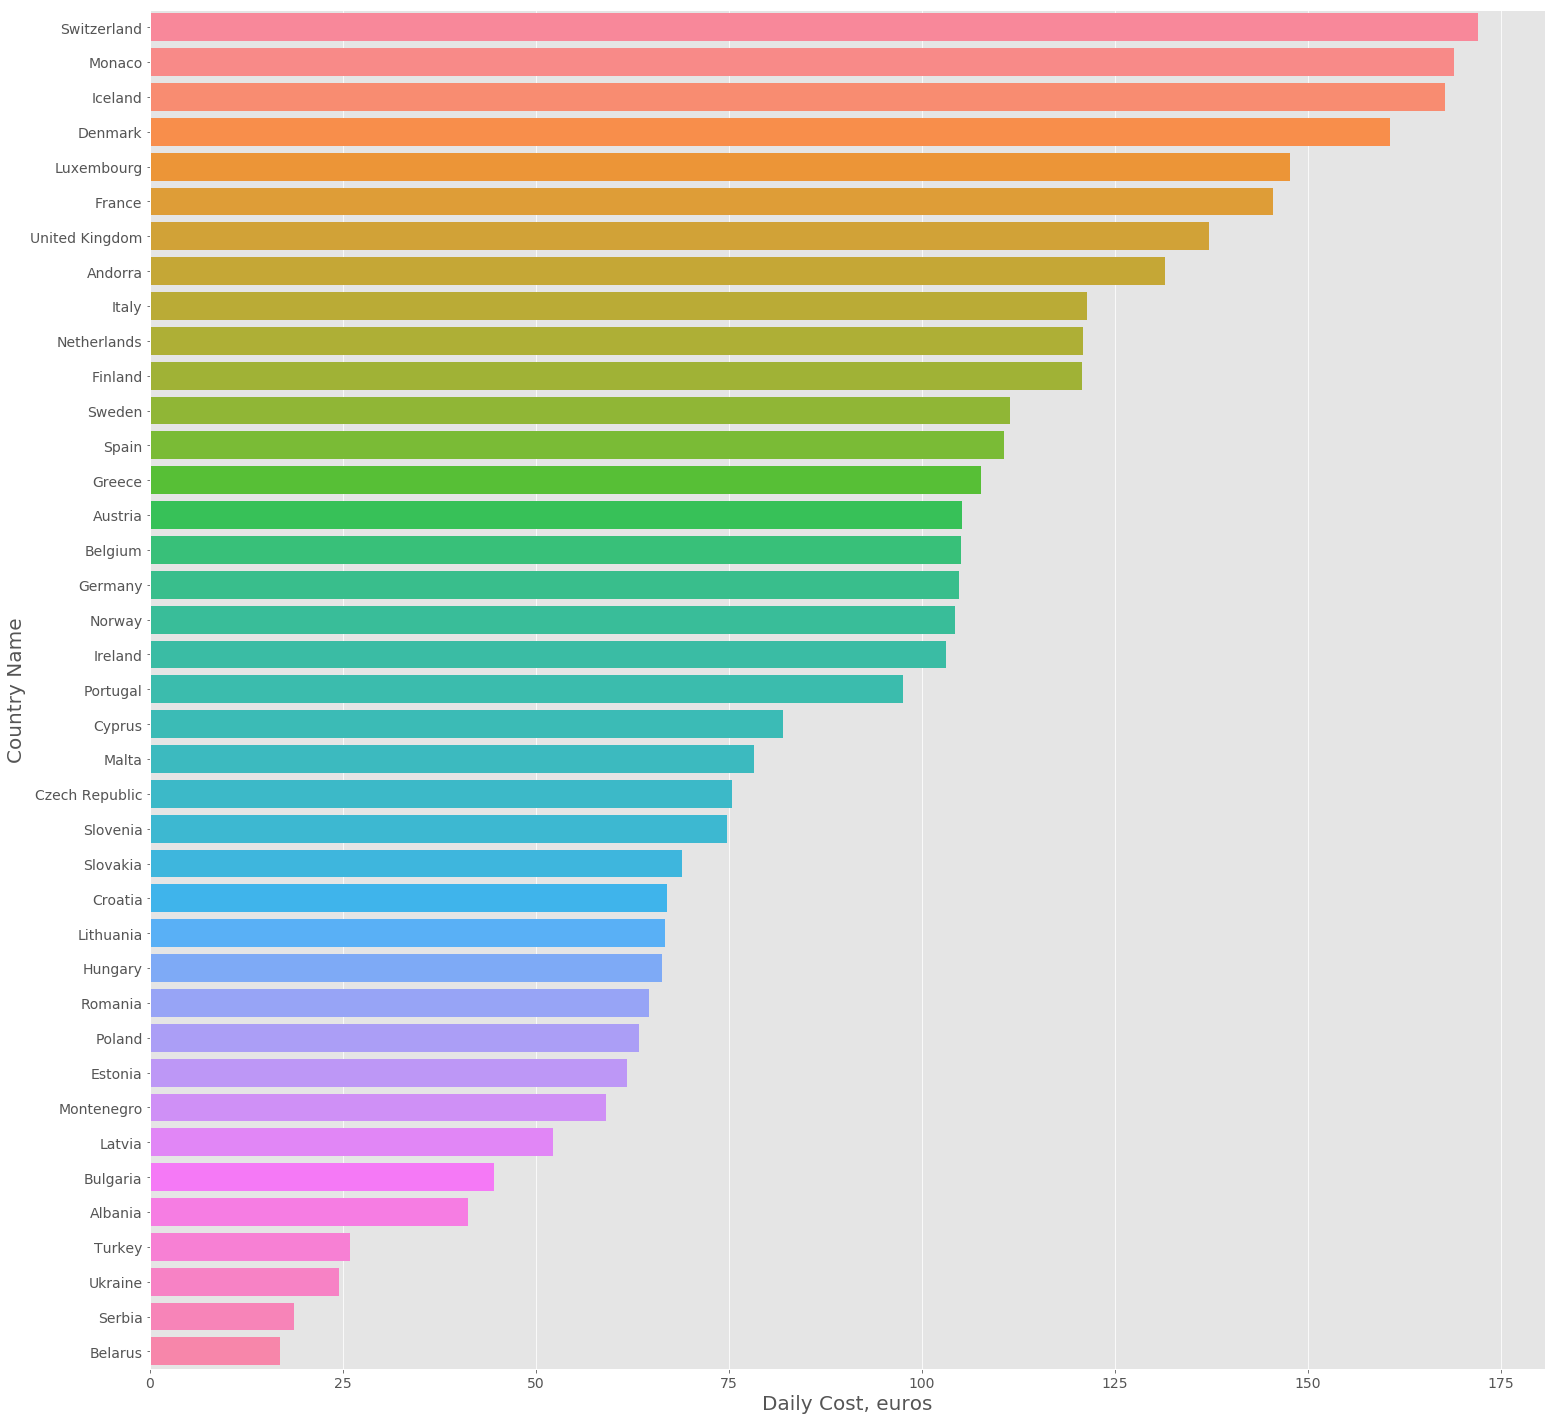

In [28]:
plt.figure(figsize=(25,25))
ax = sns.barplot(x='Daily Cost, euros', y='Country Name', data=df_merged1, orient='h', saturation= 1.7)
ax.set_xlabel('Daily Cost, euros')
plt.ylabel('Country Name', fontsize=20)
ax.tick_params(labelsize=14)
plt.xlabel('Daily Cost, euros', fontsize=20)

Ok. We get information about countries and daily costs. But as we can see some countries have daily costs much higher than my friends can allow to spend. That's why we exclude that countries which have daily costs more than 125 euros per day despite my friends had wish to visit France

In [29]:
#exclude countries from db which have daily costs more than 125 euros
df_merged1.drop(df_merged1[df_merged1['Daily Cost, euros']>125].index,axis=0, inplace=True)

In [30]:
final_db=df_merged1
final_db.shape


(31, 5)

In [31]:
final_db.sort_values(['Daily Cost, euros'], ascending=False, axis=0, inplace=True)

Text(0.5, 0, 'Daily Cost, euros')

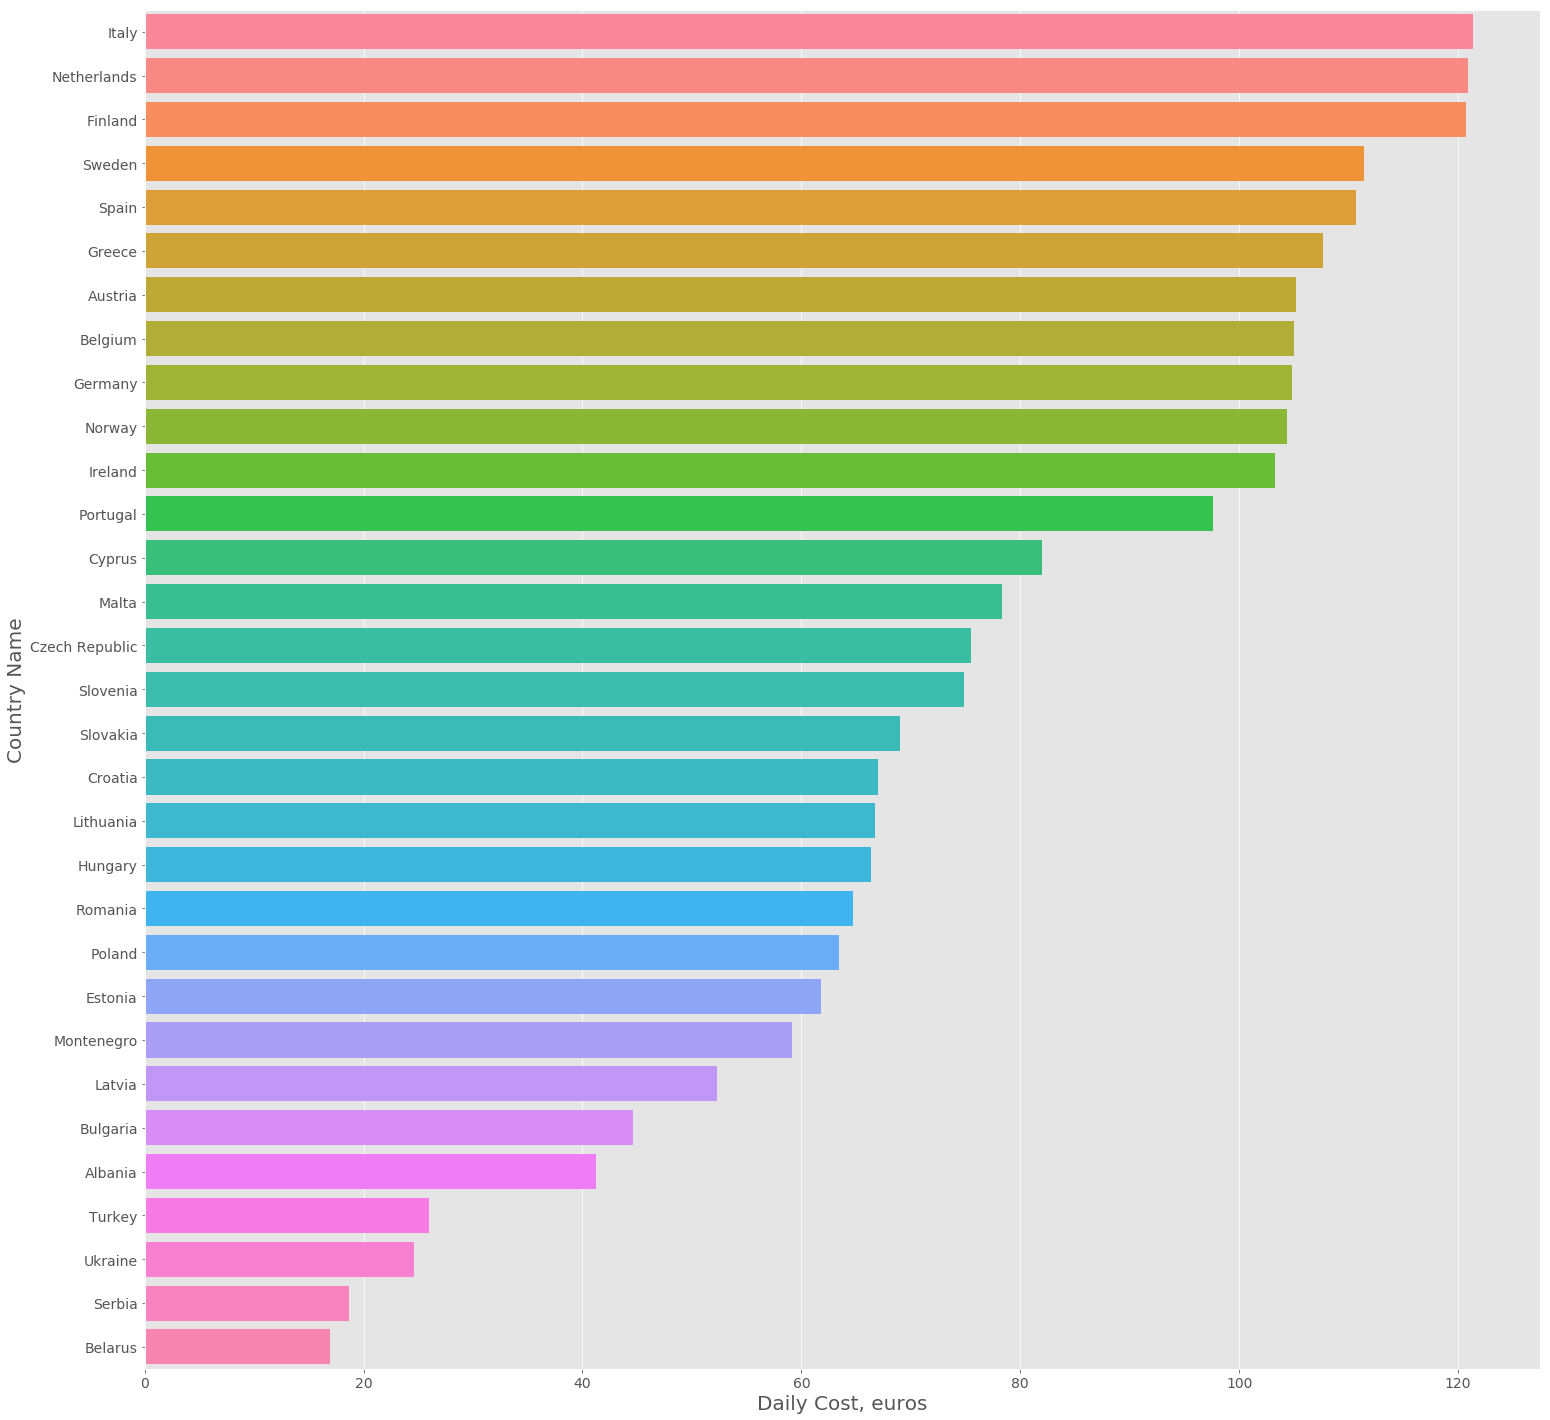

In [32]:
plt.figure(figsize=(25,25))
ax = sns.barplot(x='Daily Cost, euros', y='Country Name', data=final_db, orient='h', saturation= 1.7)
plt.ylabel('Country Name', fontsize=20)
ax.tick_params(labelsize=14)
plt.xlabel('Daily Cost, euros', fontsize=20)

#### 2nd step. Create database of friends interesting basing on their choice

All possible venues using Foursquare within 10 km from Capitals center.
Let's use Foursquare API to get venues (their location, category)

In [33]:
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [34]:
# Define Foursquare Credentials and Version

CLIENT_ID = '' # Foursquare ID
CLIENT_SECRET = '' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [35]:
LIMIT=1000

In [217]:
def getNearbyVenues(country, names, latitudes, longitudes, cost, radius=10000):
    
    venues_list=[]
    for country, name, lat, lng, cost in zip(country, names, latitudes, longitudes, cost):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
                
        # return only relevant information for each nearby venue
        venues_list.append([(
            country,
            name,
            lat, 
            lng, 
            cost,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [ 
                  'Country Name',
                  'Capital Name', 
                  'Capital Latitude', 
                  'Capital Longitude', 
                  'Daily Cost, euros',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [218]:
capital_venues = getNearbyVenues(country=final_db['Country Name'],
                                   names=final_db['Capital Name'],
                                   latitudes=final_db['Capital Latitude'],
                                   longitudes=final_db['Capital Longitude'],
                                   cost=final_db['Daily Cost, euros'])                                  

Rome
Amsterdam
Helsinki
Stockholm
Madrid
Athens
Vienna
Brussels
Berlin
Oslo
Dublin
Lisbon
Nicosia
Valletta
Prague
Ljubljana
Bratislava
Zagreb
Vilnius
Budapest
Bucharest
Warsaw
Tallinn
Podgorica
Riga
Sofia
Tirana
Ankara
Kyiv
Belgrade
Minsk


Finally we get new data base with all possible venues

In [219]:
capital_venues.head()

,Country Name,Capital Name,Capital Latitude,Capital Longitude,"Daily Cost, euros",Venue,Venue Latitude,Venue Longitude,Venue Category
0,Italy,Rome,41.9,12.483333,121.39,Pane e Salame,41.900653,12.481662,Sandwich Place
1,Italy,Rome,41.9,12.483333,121.39,Fontana di Trevi,41.900947,12.483307,Fountain
2,Italy,Rome,41.9,12.483333,121.39,Venchi,41.900042,12.480883,Ice Cream Shop
3,Italy,Rome,41.9,12.483333,121.39,La Prosciutteria,41.901888,12.484467,Italian Restaurant
4,Italy,Rome,41.9,12.483333,121.39,Il Panino Ingegnoso,41.899982,12.479195,Sandwich Place


In [220]:
capital_venues.shape

(3100, 9)

Now let's create list of unique Venue Category, where my friends can choose what they are intereted in

In [221]:
uniquevalues = np.unique(capital_venues[['Venue Category']].values)
uniquevalues

array(['Accessories Store', 'Airport Service', 'American Restaurant',
       'Antique Shop', 'Arcade', 'Argentinian Restaurant', 'Art Gallery',
       'Art Museum', 'Arts & Crafts Store', 'Arts & Entertainment',
       'Asian Restaurant', 'Athletics & Sports', 'Austrian Restaurant',
       'BBQ Joint', 'Bagel Shop', 'Bakery', 'Bar', 'Basketball Stadium',
       'Bay', 'Beach', 'Beach Bar', 'Bed & Breakfast', 'Beer Bar',
       'Beer Garden', 'Beer Store', 'Belgian Restaurant',
       'Bike Rental / Bike Share', 'Bistro', 'Blini House',
       'Boarding House', 'Bookstore', 'Botanical Garden', 'Boutique',
       'Breakfast Spot', 'Brewery', 'Bridal Shop', 'Bridge', 'Buffet',
       'Burger Joint', 'Burrito Place', 'Butcher', 'Cafeteria', 'Café',
       'Camera Store', 'Canal', 'Candy Store', 'Capitol Building',
       'Castle', 'Caucasian Restaurant', 'Cheese Shop',
       'Chinese Restaurant', 'Chocolate Shop', 'Church', 'Circus',
       'City Hall', 'Climbing Gym', 'Clothing Store', '

My friends have top-5 interests what they must see.  
1. Science Museum
2. Wine Bar
3. Vegetarian / Vegan Restaurant
4. Historic Site
5. Beer Bar

In [205]:
list_interesting = []  # Here we define an empty list.
while True:
    interesting = input('Please enter a name of interesting in a list above: ')
    if interesting == 'exit':
        break
    list_interesting.append(interesting)
    print(interesting)

Please enter a name of interesting in a list above:  Vegetarian / Vegan Restaurant


Vegetarian / Vegan Restaurant


Please enter a name of interesting in a list above:  Science Museum


Science Museum


Please enter a name of interesting in a list above:  Wine Bar


Wine Bar


Please enter a name of interesting in a list above:  Historic Site


Historic Site


Please enter a name of interesting in a list above:  Beer Bar


Beer Bar


Please enter a name of interesting in a list above:  exit


We get list of interesting of my friends, lets upload current database to database which contains friends inerests

In [206]:
list_interesting

['Vegetarian / Vegan Restaurant',
 'Science Museum',
 'Wine Bar',
 'Historic Site',
 'Beer Bar']

In [222]:
interest = capital_venues[capital_venues['Venue Category'].isin(list_interesting) ]
interest.reset_index(drop = True, inplace = True)

In [223]:
interest

,Country Name,Capital Name,Capital Latitude,Capital Longitude,"Daily Cost, euros",Venue,Venue Latitude,Venue Longitude,Venue Category
0,Italy,Rome,41.9,12.483333,121.39,Palazzo Doria Pamphili,41.897847,12.481534,Historic Site
1,Italy,Rome,41.9,12.483333,121.39,Foro di Traiano,41.894729,12.484871,Historic Site
2,Italy,Rome,41.9,12.483333,121.39,Scalinata di Trinità dei Monti,41.905974,12.482647,Historic Site
3,Italy,Rome,41.9,12.483333,121.39,Foro di Cesare,41.894128,12.485232,Historic Site
4,Italy,Rome,41.9,12.483333,121.39,Ai Tre Scalini,41.896348,12.490418,Wine Bar
5,Italy,Rome,41.9,12.483333,121.39,Palazzo Valentini,41.896691,12.483806,Historic Site
6,Italy,Rome,41.9,12.483333,121.39,Foro Romano,41.891434,12.486455,Historic Site
7,Italy,Rome,41.9,12.483333,121.39,Portico d'Ottavia,41.892382,12.478500,Historic Site
8,Italy,Rome,41.9,12.483333,121.39,La Barrique,41.898144,12.490216,Wine Bar
9,Italy,Rome,41.9,12.483333,121.39,Teatro di Marcello,41.891931,12.479798,Historic Site


#### 3rd step.

After we get database with friends interests, let's make recommendation where they should go.

Next, let's change a bit database . We move each Venue Category as column and then group rows by capital names and by taking the mean of the frequency of occurrence of each category

In [359]:
# one hot encoding
interest_onehot = pd.get_dummies(interest[['Venue Category']], prefix="", prefix_sep="")


# add capital Name, country name and daily cost column back to dataframe
interest_onehot['Capital Name'] = interest['Capital Name'] 


# move capital Name, country name and daily cost column to the first column
fixed_columns = [interest_onehot.columns[-1]] + list(interest_onehot.columns[:-1])
interest_onehot = interest_onehot[fixed_columns]

interest_onehot.head()

,Capital Name,Beer Bar,Historic Site,Science Museum,Vegetarian / Vegan Restaurant,Wine Bar
0,Rome,0,1,0,0,0
1,Rome,0,1,0,0,0
2,Rome,0,1,0,0,0
3,Rome,0,1,0,0,0
4,Rome,0,0,0,0,1


In [360]:
interest_grouped = interest_onehot.groupby('Capital Name').mean().reset_index()

interest_grouped.head()

,Capital Name,Beer Bar,Historic Site,Science Museum,Vegetarian / Vegan Restaurant,Wine Bar
0,Amsterdam,0.250000,0.000000,0.000000,0.250000,0.500000
1,Ankara,0.000000,0.800000,0.000000,0.200000,0.000000
2,Athens,0.000000,0.666667,0.000000,0.066667,0.266667
3,Belgrade,0.000000,0.000000,0.000000,0.500000,0.500000
4,Berlin,0.181818,0.272727,0.181818,0.181818,0.181818


Preferences of my friends to visit that country which contains all their top-5 interests.
Let's check if there are countries which have all top-5

In [393]:
interest_top5 = interest_grouped[interest_grouped.loc[:]!=0].dropna()
interest_top5.reset_index(drop = True, inplace = True)
interest_top5

,Capital Name,Beer Bar,Historic Site,Science Museum,Vegetarian / Vegan Restaurant,Wine Bar
0,Berlin,0.181818,0.272727,0.181818,0.181818,0.181818
1,Warsaw,0.333333,0.111111,0.111111,0.222222,0.222222


Visual this for better copmaring

Text(0.5, 1.0, 'Venues Category information')

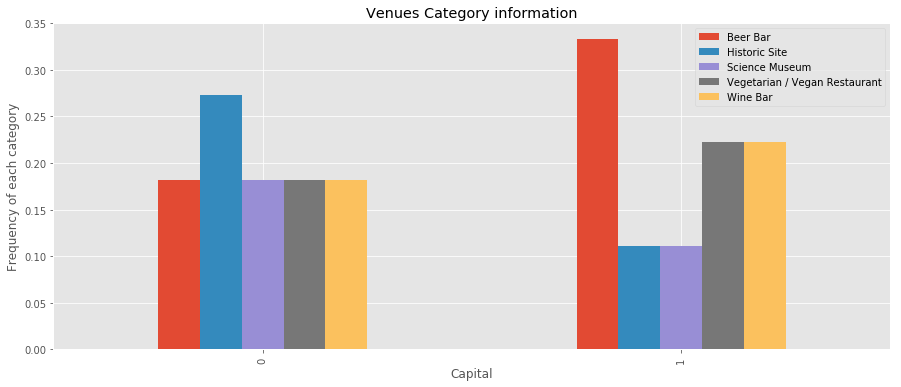

In [390]:
interest_top5.plot(kind='bar', figsize=(15, 6), rot=90)

plt.xlabel('Capital')
plt.ylabel('Frequency of each category')
plt.title('Venues Category information')

First of all my friends want to visit Museums and historic sites. So they choose Berlin for see on map venues

In [396]:
chosen_city = input("Input city which you have chosen")
print(chosen_city)

Input city which you have chosen Berlin


Berlin


In [397]:
address = chosen_city

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

52.5170365 13.3888599


In [401]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate map centred around Ecco


# add spots to the map as blue circle markers
for lat, lng, label in zip(interest['Venue Latitude'], interest['Venue Longitude'], interest['Venue Category']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

Let's discover what;s else can be explored in chosen city

In [407]:
explore_chosen_city = capital_venues[capital_venues['Capital Name'] == chosen_city].reset_index(drop=True)
explore_chosen_city.head()

,Country Name,Capital Name,Capital Latitude,Capital Longitude,"Daily Cost, euros",Venue,Venue Latitude,Venue Longitude,Venue Category
0,Germany,Berlin,52.51666667,13.4,104.87,Lustgarten,52.518469,13.399454,Garden
1,Germany,Berlin,52.51666667,13.4,104.87,Deutsches Historisches Museum,52.517788,13.396948,History Museum
2,Germany,Berlin,52.51666667,13.4,104.87,Gendarmenmarkt,52.513570,13.392720,Plaza
3,Germany,Berlin,52.51666667,13.4,104.87,Ischtar-Tor,52.520742,13.397205,Historic Site
4,Germany,Berlin,52.51666667,13.4,104.87,Maxim Gorki Theater,52.518941,13.395245,Theater


In [413]:
venues_map1 = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around Ecco


# add spots to the map as blue circle markers
for lat, lng, label in zip(explore_chosen_city['Venue Latitude'], explore_chosen_city['Venue Longitude'], explore_chosen_city['Venue Category']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map1)

# display map
venues_map1

Let's clustering it for more exploring city

In [457]:
# one hot encoding
chosen_city_onehot = pd.get_dummies(explore_chosen_city[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chosen_city_onehot['Venue'] =explore_chosen_city['Venue'] 

# move neighborhood column to the first column
fixed_columns = [chosen_city_onehot.columns[-1]] + list(chosen_city_onehot.columns[:-1])
chosen_city_onehot = chosen_city_onehot[fixed_columns]
chosen_city_onehot = chosen_city_onehot.groupby('Venue').mean().reset_index()

In [458]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [460]:
num_top_venues = 7

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Venue']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
chosen_city_onehot_sorted = pd.DataFrame(columns=columns)
chosen_city_onehot_sorted['Venue'] = chosen_city_onehot['Venue']

for ind in np.arange(chosen_city_onehot.shape[0]):
    chosen_city_onehot_sorted.iloc[ind, 1:] = return_most_common_venues(chosen_city_onehot.iloc[ind, :], num_top_venues)

chosen_city_onehot_sorted.head()

,Venue,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,19grams,Coffee Shop,Wine Bar,Café,German Restaurant,Garden,Food Court,Farmers Market
1,Allan's Breakfast Club & Wine Bar,Breakfast Spot,Wine Bar,Café,German Restaurant,Garden,Food Court,Farmers Market
2,BEN RAHIM,Coffee Shop,Wine Bar,Café,German Restaurant,Garden,Food Court,Farmers Market
3,BRŁO Brwhouse,Brewery,Café,German Restaurant,Garden,Food Court,Farmers Market,Falafel Restaurant
4,Baden im Wein,Wine Bar,Café,German Restaurant,Garden,Food Court,Farmers Market,Falafel Restaurant


In [461]:
# set number of clusters
kclusters = 7

chosen_city_onehot_grouped_clustering = chosen_city_onehot.drop('Venue', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chosen_city_onehot_grouped_clustering)


In [462]:
# add clustering labels
chosen_city_onehot_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [463]:
chosen_city_onehot_merged = explore_chosen_city

chosen_city_onehot_merged = chosen_city_onehot_merged.join(chosen_city_onehot_sorted.set_index('Venue'), on='Venue')

chosen_city_onehot_merged.head()

,Country Name,Capital Name,Capital Latitude,Capital Longitude,"Daily Cost, euros",Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Germany,Berlin,52.51666667,13.4,104.87,Lustgarten,52.518469,13.399454,Garden,0,Garden,Wine Bar,Café,German Restaurant,Food Court,Farmers Market,Falafel Restaurant
1,Germany,Berlin,52.51666667,13.4,104.87,Deutsches Historisches Museum,52.517788,13.396948,History Museum,0,History Museum,Wine Bar,Café,Garden,Food Court,Farmers Market,Falafel Restaurant
2,Germany,Berlin,52.51666667,13.4,104.87,Gendarmenmarkt,52.513570,13.392720,Plaza,0,Plaza,Wine Bar,Garden,Food Court,Farmers Market,Falafel Restaurant,Event Space
3,Germany,Berlin,52.51666667,13.4,104.87,Ischtar-Tor,52.520742,13.397205,Historic Site,0,Historic Site,Wine Bar,Café,Garden,Food Court,Farmers Market,Falafel Restaurant
4,Germany,Berlin,52.51666667,13.4,104.87,Maxim Gorki Theater,52.518941,13.395245,Theater,0,Theater,Wine Bar,Brewery,Garden,Food Court,Farmers Market,Falafel Restaurant


In [464]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chosen_city_onehot_merged['Venue Latitude'],chosen_city_onehot_merged['Venue Longitude'], chosen_city_onehot_merged['Venue'], chosen_city_onehot_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

As my friends can see Berlin is interesting city when you can explore many things more.

### Results and Discussion

Our analysis shows that based on budgets short, friends interests and preferences we have chosen city. 
They cant spend more 125 euros per day, also they have their interests what they want to explore first of all in the city. 
This analysis gives them high level understanding what they can find in the city (using Venue Category).
After directing our attention to the top-5 friends interests we give them that cities which setisfied their interests. 
After when they choose one of the city, they explore more about it using clustering.
Also if they want to change their preferences or  when they wont have limit in budget, they can easier change parameteres and discover new recommendation places where they can go. 

Purpose of this analysis was to provide  info about cities and city which my friends potential choose.  


### Conclusion

Purpose of this project in high level was to help my friends to choose city for their vacation based on their interests and preferences and budget limit using foursquare. 
Also this project helps them to explore ore information about city which they choose (Berlin) using foursquare and clustering.

Final decission on where to go they can take after more detail exploring city which they choose or candidates